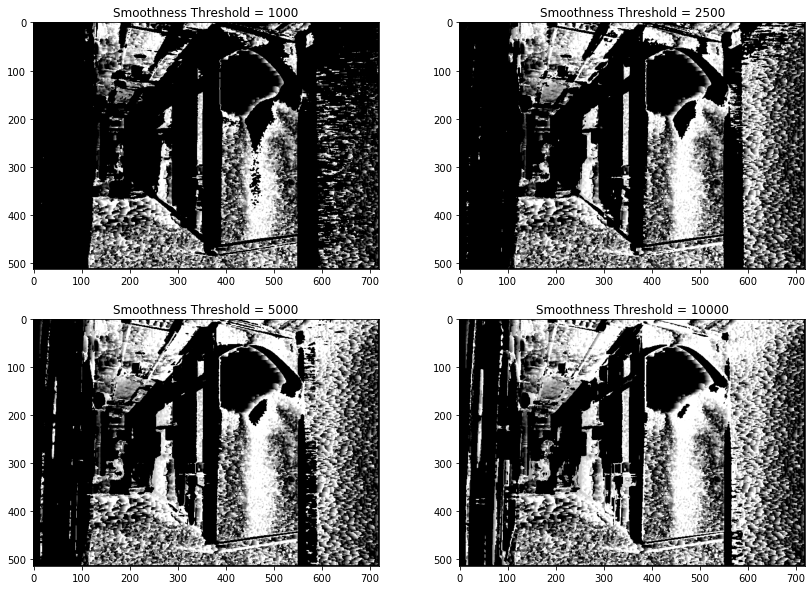

In [108]:
# Imports
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function definition disparitySSDSmoothness
def disparitySSDSmoothness(leftImg, rightImg, maxSearchBound, winSize, smoothThresh):
    
    # Gaussian Blurring for winSize > 1
    if (winSize > 1):
        leftImg = cv2.GaussianBlur(leftImg, (winSize, winSize), 0)
        rightImg = cv2.GaussianBlur(rightImg, (winSize, winSize), 0)

    # Converting image type to double
    leftImg = np.double(leftImg)
    rightImg = np.double(rightImg)
    
    # Initialization of output image and energy matrices
    outImg = np.zeros(leftImg.shape)
    energies = np.zeros(leftImg.shape)
    energies_thresh = np.zeros(leftImg.shape)

    disparityCost = []
    
    # Left Image pixel matching
    for row in range(leftImg.shape[0] - (winSize - 1)):
        for col in range(leftImg.shape[1] - (winSize - 1)):
            
            matLeft = leftImg[row:row + winSize, col:col + winSize]

            if col - maxSearchBound >= 0:
                disparityList = []
                diff = []
                # Right Image pixel matching with maxSearchBound at Epipolar Lines
                for disparityRange in range(maxSearchBound):
                    
                    matRight = rightImg[row:row + (winSize), col - disparityRange:col - disparityRange + (winSize)]
                    SD = (matRight - matLeft) ** 2
                    SSD = np.sum(SD)
                    disparityList.append(SSD)
                
                # Loop for energy minimization
                for i in range(0,maxSearchBound-1):
                    diff.append(np.abs(disparityList[i]-disparityList[i+1]))
                smoothnessCost = np.sum(diff)
                
                # Energy computation for indexed pixel
                energy = min(disparityList) + smoothnessCost
                
                # Energy computation with respect to user-defined smoothness threshold
                energyThresh = min(disparityList) + smoothThresh
                
                # Comparison of neighbouring pixels for similar disparities using energy minimization
                if energy < energyThresh:
                    dispIndex = disparityList.index(min(disparityList))
                    outImg[row, col] = dispIndex
            else:
                pass
            
    # Normalization of pixel values
    #outImg = 255 * outImg / maxSearchBound
    outImg = 255 * outImg / (np.max(outImg))
    outImg = np.uint8(outImg)
    return outImg
    
    
# Reading images
leftImg = cv2.imread('frameLeftgray.png', 0)
rightImg = cv2.imread('frameRightgray.png', 0)
    
# Calling disparitySSDSmoothness function for window size 3 and smoothness threshold 1000,2500,5000,10000
outImg1 = disparitySSDSmoothness(leftImg, rightImg, 14, 3, 1000)  
outImg2 = disparitySSDSmoothness(leftImg, rightImg, 14, 3, 2500)
outImg3 = disparitySSDSmoothness(leftImg, rightImg, 14, 3, 5000)
outImg4 = disparitySSDSmoothness(leftImg, rightImg, 14, 3, 10000)

fig = plt.figure(figsize=(14,10))

ax1 = fig.add_subplot(2,2,1)
ax1.set_title('Smoothness Threshold = 1000')
ax1.imshow(outImg1, cmap='gray')

ax2 = fig.add_subplot(2,2,2)
ax2.set_title('Smoothness Threshold = 2500')
ax2.imshow(outImg2, cmap='gray')

ax3 = fig.add_subplot(2,2,3)
ax3.set_title('Smoothness Threshold = 5000')
ax3.imshow(outImg3, cmap='gray')

ax4 = fig.add_subplot(2,2,4)
ax4.set_title('Smoothness Threshold = 10000')
ax4.imshow(outImg4, cmap='gray')